In [1]:
import pandas as pd
import quandl

In [2]:
df = quandl.get('WIKI/GOOGL')

In [3]:
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [4]:
#df = quandl.get('BATS/BATS_GOOGL", authtoken="_csNr4TjmrKzfvyMC-CZ", start_date="1970-01-01", end_date="1970-01-01')

In [5]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [6]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0

In [7]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [8]:
df = df[['Adj. Close', 'HL_PCT','PCT_change','Adj. Volume']]

In [9]:
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [10]:
forecast_col =  'Adj. Close'
df.fillna(-99999, inplace=True)


In [11]:
import math

forecast_out = int(math.ceil(0.1 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
print(forecast_out)
print(df.head())

343
            Adj. Close    HL_PCT  PCT_change  Adj. Volume       label
Date                                                                 
2004-08-19   50.322842  3.712563    0.324968   44659000.0  214.005615
2004-08-20   54.322689  0.710922    7.227007   22834300.0  210.725489
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  208.072299
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  218.288837
2004-08-25   53.164113  1.886792    1.183658    9188600.0  223.309335


In [12]:
df.dropna(inplace=True)
print(df.tail())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2016-11-04      781.10  0.944821    1.270582    1970603.0  1094.00
2016-11-07      802.03  0.370310    0.890622    1992570.0  1053.15
2016-11-08      811.98  0.500012    1.240602    1769069.0  1026.55
2016-11-09      805.59  0.759692    0.468927    3098510.0  1054.09
2016-11-10      780.29  3.815248   -3.667901    5909609.0  1006.94


In [13]:
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(forecast_out)
print(df.head())

31
            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  67.739104
2004-08-20   54.322689  0.710922    7.227007   22834300.0  69.399229
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.752232
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  69.639972
2004-08-25   53.164113  1.886792    1.183658    9188600.0  69.078238


# Regression Training and Testing

In [14]:
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = np.array(df.drop(['label'],1))
y = np.array(df['label'])

x = preprocessing.scale(x)


y = np.array(df['label'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


clf = LinearRegression()
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)

print(accuracy)

#print(len(x), len(y))

0.97156314140321


/var/folders/58/j_8hz7px0l30bjvcrr05krz00000gn/T/ipykernel_12246/1981636452.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['label'],1))


In [15]:
clf = svm.SVR()
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)

print(accuracy)

0.7967079529592376


In [16]:
clf = svm.SVR(kernel='poly')
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)

print(accuracy)

0.7148414914044499


In [17]:
clf = LinearRegression(n_jobs=-1) #10 or 2 or so on
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)

print(accuracy)

0.97156314140321


# Forecasting and Predicting

In [18]:
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
x = np.array(df.drop(['label'],1))
x = x[:-forecast_out]
x_lately = x[-forecast_out:]

x = preprocessing.scale(x)

df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)

print(accuracy)

0.9666122632697131


/var/folders/58/j_8hz7px0l30bjvcrr05krz00000gn/T/ipykernel_12246/741299155.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['label'],1))


In [19]:
df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)

forecast_set = clf.predict(x_lately)

print(forecast_set, accuracy, forecast_out)

[ -5435906.72409012  -4980385.47425699  -5062597.25774458
  -3675415.28462089  -5248447.6050357   -5044952.09814113
  -4640314.08082904  -3539084.97033011  -3712190.56038579
  -5675295.14532778  -6813298.05093362  -5329991.18673711
  -3905053.62368663  -3287724.86806256  -3620676.17546556
  -3718959.94434615  -4136383.13582674  -5640108.53776362
 -13052553.8741585  -18136915.62378205 -10735591.95221157
  -7025620.97307616  -5103716.22314538  -3721678.15989712
  -6345503.46123842  -4242964.60929159  -5628785.75055257
  -3154113.18685386  -4460257.61552284  -3078137.81184265
  -3196068.93698144] 0.9654809720156228 31


# Regression forecasting and predicting

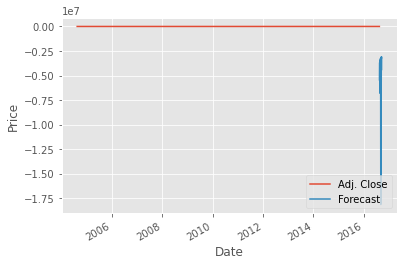

In [20]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style


style.use('ggplot')

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Pickling and Scaling

In [21]:
import pickle

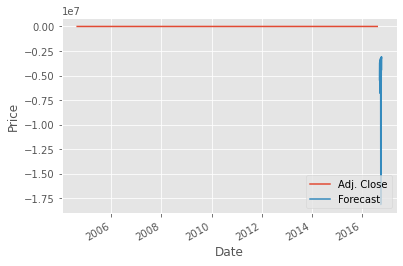

In [22]:
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)

pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

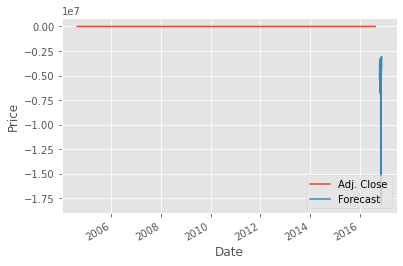

In [23]:
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#Regression How it Works

# How to program the Best Fit Slope

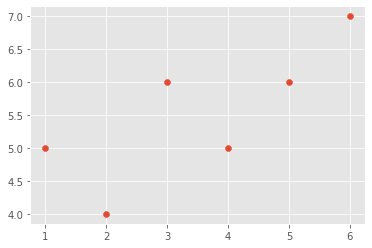

In [27]:
from statistics import mean
import numpy as np

xs = [1,2,3,4,5,6]
ys = [5,4,6,5,6,7]

plt.scatter(xs, ys)
plt.show()

In [ ]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

def best_fit_slope(xs, ys):
    return m

m = best_fit_slope(xs,ys)

